In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import timedelta

# Pandas setting

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
pd.reset_option("display.max_rows")

# Import the dataset

In [4]:
hotel = pd.read_csv("./Raw dataset/hotel.csv")

In [5]:
hotel

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate
0,6,2015-July-1,27,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,2015-07-03
1,3,2015-July-2,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05
2,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
3,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05
4,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30406,17,2016-December-30,53,2,5,2,0,0,SC,FRA,Online TA,TA/TO,0,A,A,0,No Deposit,9,NULL,0,Transient,90.34,0,1,2017-01-06
30407,177,2016-December-30,53,2,5,0,0,0,BB,PRT,Direct,Direct,0,E,K,2,No Deposit,NULL,NULL,0,Transient,1.29,0,2,2017-01-06
30408,107,2016-December-31,53,2,5,2,0,0,BB,FRA,Offline TA/TO,TA/TO,0,A,B,0,No Deposit,28,NULL,0,Transient,103.57,0,0,2017-01-07
30409,310,2016-December-27,53,2,10,2,0,0,SC,DEU,Online TA,TA/TO,0,A,A,2,No Deposit,9,NULL,0,Transient-Party,68.57,0,2,2017-01-08


## Brief scanning through the dataset

In [6]:
hotel.head()

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate
0,6,2015-July-1,27,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,2015-07-03
1,3,2015-July-2,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05
2,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
3,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05
4,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05


In [7]:
hotel.columns

Index(['LeadTime', 'ArrivalDate', 'ArrivalWeekNumber', 'StaysInWeekendNights',
       'StaysInWeekNights', 'NumberOfAdult', 'NumberOfChildren',
       'NumberOfBabies', 'BookingMeal', 'Country', 'MarketSegment',
       'BookingDistributionChannel', 'RepeatedGuest', 'ReservedRoom',
       'AssignedRoom', 'BookingChanges', 'DepositType', 'TravelAgent',
       'BookingCompany', 'DaysInWaitingList', 'CustomerType',
       'AverageDailyRate', 'BookingParking', 'TotalOfSpecialRequests',
       'CheckoutDate'],
      dtype='object')

In [8]:
hotel.describe()

,LeadTime,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,RepeatedGuest,BookingChanges,DaysInWaitingList,AverageDailyRate,BookingParking,TotalOfSpecialRequests
count,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000
mean,73.181579,31.472428,0.781757,2.079083,1.812371,0.092894,0.007596,0.033639,0.252409,3.224228,99.988053,0.046102,0.686659
std,82.242904,13.359593,0.861400,1.391060,0.533932,0.372456,0.114581,0.180301,0.691626,21.503967,37.975558,0.210335,0.800673
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,21.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.500000,0.000000,0.000000
50%,44.000000,34.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,1.000000
75%,108.000000,42.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,0.000000,1.000000
max,429.000000,53.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,379.000000,451.500000,3.000000,5.000000


In [9]:
hotel.dtypes

LeadTime                        int64
ArrivalDate                    object
ArrivalWeekNumber               int64
StaysInWeekendNights            int64
StaysInWeekNights               int64
NumberOfAdult                   int64
NumberOfChildren                int64
NumberOfBabies                  int64
BookingMeal                    object
Country                        object
MarketSegment                  object
BookingDistributionChannel     object
RepeatedGuest                   int64
ReservedRoom                   object
AssignedRoom                   object
BookingChanges                  int64
DepositType                    object
TravelAgent                    object
BookingCompany                 object
DaysInWaitingList               int64
CustomerType                   object
AverageDailyRate              float64
BookingParking                  int64
TotalOfSpecialRequests          int64
CheckoutDate                   object
dtype: object

In [10]:
len(hotel)

30411

# Data Cleaning

### Data type transformation

In [11]:
hotel["ArrivalDate"] = pd.to_datetime(hotel['ArrivalDate'], format="%Y-%B-%d")
hotel["CheckoutDate"] = pd.to_datetime(hotel['CheckoutDate'], format="%Y-%m-%d")

### Clean the data with spared space

In [12]:
hotel["TravelAgent"] = hotel["TravelAgent"].apply(lambda x: x.strip())
hotel["DepositType"] = hotel["DepositType"].apply(lambda x: x.strip())
hotel["BookingMeal"] = hotel["BookingMeal"].apply(lambda x: x.strip())
hotel["AssignedRoom"] = hotel["AssignedRoom"].apply(lambda x: x.strip())
hotel["BookingCompany"] = hotel["BookingCompany"].apply(lambda x: x.strip())
hotel["ReservedRoom"] = hotel["ReservedRoom"].apply(lambda x: x.strip())

### Create arbitrary column

#### Total Night = StaysInWeekNights + StaysInWeekendNights

In [13]:
hotel["TotalNight"] = hotel["StaysInWeekNights"] + hotel["StaysInWeekendNights"]

In [14]:
# Function to category the transaction into cross-weekday-weekend, weekday, weekend or the same day
def change_value(row):
    if row['StaysInWeekNights'] > 0 and row['StaysInWeekendNights'] > 0:
        return 'Cross'
    elif row['StaysInWeekNights'] > 0 and row['StaysInWeekendNights'] == 0:
        return 'Week'
    elif row['StaysInWeekNights'] == 0 and row['StaysInWeekendNights'] > 0:
        return 'Weekend'
    elif row['StaysInWeekNights'] == 0 and row['StaysInWeekendNights'] == 0:
        return 'SameDay'
    else:
        return None  # 或者根據需求回傳其他值

hotel['WeekOrWeekendOrCross'] = hotel.apply(change_value, axis=1)

hotel

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate,TotalNight,WeekOrWeekendOrCross
0,6,2015-07-01,27,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,2015-07-03,2,Week
1,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05,3,Week
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,2,Week
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05,2,Week
4,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,2,Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30406,17,2016-12-30,53,2,5,2,0,0,SC,FRA,Online TA,TA/TO,0,A,A,0,No Deposit,9,NULL,0,Transient,90.34,0,1,2017-01-06,7,Cross
30407,177,2016-12-30,53,2,5,0,0,0,BB,PRT,Direct,Direct,0,E,K,2,No Deposit,NULL,NULL,0,Transient,1.29,0,2,2017-01-06,7,Cross
30408,107,2016-12-31,53,2,5,2,0,0,BB,FRA,Offline TA/TO,TA/TO,0,A,B,0,No Deposit,28,NULL,0,Transient,103.57,0,0,2017-01-07,7,Cross
30409,310,2016-12-27,53,2,10,2,0,0,SC,DEU,Online TA,TA/TO,0,A,A,2,No Deposit,9,NULL,0,Transient-Party,68.57,0,2,2017-01-08,12,Cross


In [15]:
weekendnight = len(hotel[hotel["WeekOrWeekendOrCross"]=="Weekend"])
weeknight = len(hotel[hotel["WeekOrWeekendOrCross"]=="Week"])
cross_weekend = len(hotel[hotel["WeekOrWeekendOrCross"]=="Cross"])
same = len(hotel[hotel["WeekOrWeekendOrCross"]=="SameDay"])
total = weekendnight + weeknight + cross_weekend + same
print(f"There are {round(weekendnight/total*100,2)}% lived only in weekend nights")
print(f"There are {round(weeknight/total*100,2)}% lived only in week nights")
print(f"There are {round(cross_weekend/total*100,2)}% lived croos week nights and wenkend nights")
print(f"There are {round(same/total*100,2)}% lived croos week nights and wenkend nights")

There are 6.94% lived only in weekend nights
There are 47.04% lived only in week nights
There are 45.25% lived croos week nights and wenkend nights
There are 0.77% lived croos week nights and wenkend nights


In [16]:
print(weekendnight)
print(weeknight)
print(cross_weekend)
print(same)

2111
14306
13760
234


#### Total People  = Adult + Children + Babies

In [17]:
hotel["TotalPeople"] = hotel["NumberOfAdult"] + hotel["NumberOfChildren"] + hotel["NumberOfBabies"]

#### Family or not

In [18]:
hotel["IsFamily"] = np.where((hotel["NumberOfChildren"] != 0) | (hotel["NumberOfBabies"] != 0), 1, 0)

#### Revenue = Average Daily Rate * Total Night

In [19]:
hotel["Revenue"] = hotel["AverageDailyRate"] * hotel["TotalNight"]

## Drop the data

### Drop the data that "ArrivalDate" is equal to "CheckoutDate"

In [20]:
len(hotel[hotel["TotalNight"] != (hotel["CheckoutDate"]-hotel["ArrivalDate"]).dt.days])

2

In [21]:
hotel.drop(hotel[hotel["TotalNight"] != (hotel["CheckoutDate"]-hotel["ArrivalDate"]).dt.days].index, axis=0, inplace=True)

In [22]:
len(hotel)

30409

### Drop the data with "TotalPeople" is 0

In [23]:
len(hotel[hotel["TotalPeople"] == 0])

93

In [24]:
hotel.drop(hotel[hotel["TotalPeople"]==0].index, axis=0, inplace=True)

In [25]:
len(hotel)

30316

In [26]:
hotel.to_csv("hotel_aftercleaning_new.csv", index = False)

# Exploratory Descriptive Analysis

### Customer Type

In [27]:
hotel["CustomerType"].value_counts().index.to_list()

['Transient', 'Transient-Party', 'Contract', 'Group']

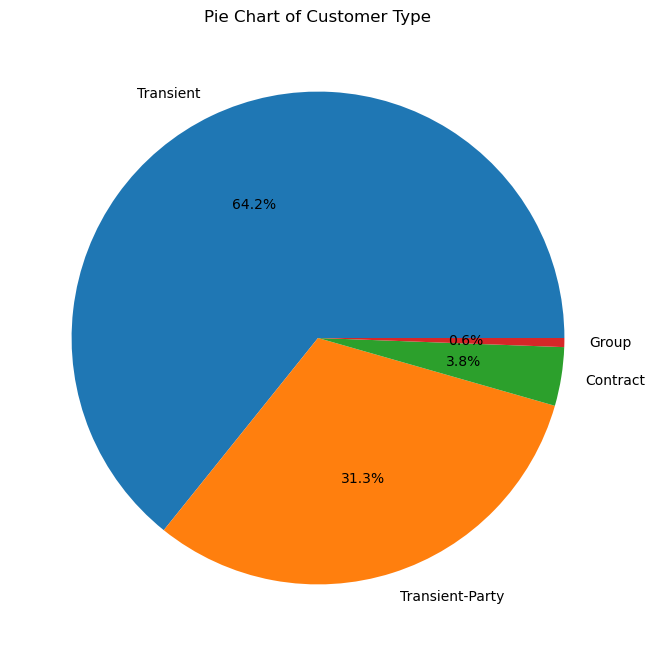

In [28]:
categories = hotel["CustomerType"].value_counts().index.to_list()
values = hotel["CustomerType"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Customer Type')
plt.show()

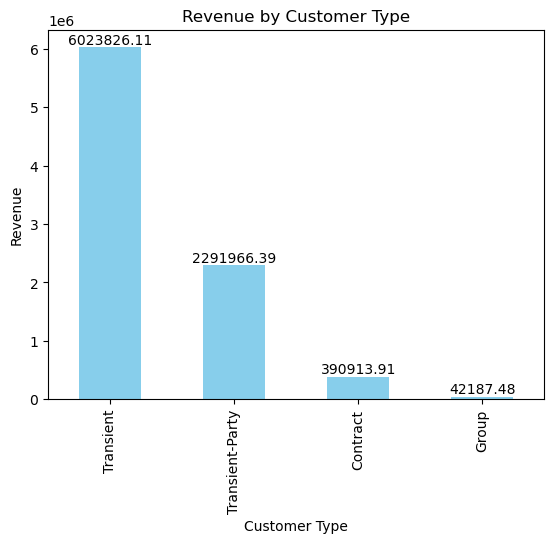

In [29]:
customertype_revenue = hotel.groupby("CustomerType")["Revenue"].sum().sort_values(ascending=False)
customertype_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')

for index, value in enumerate(customertype_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

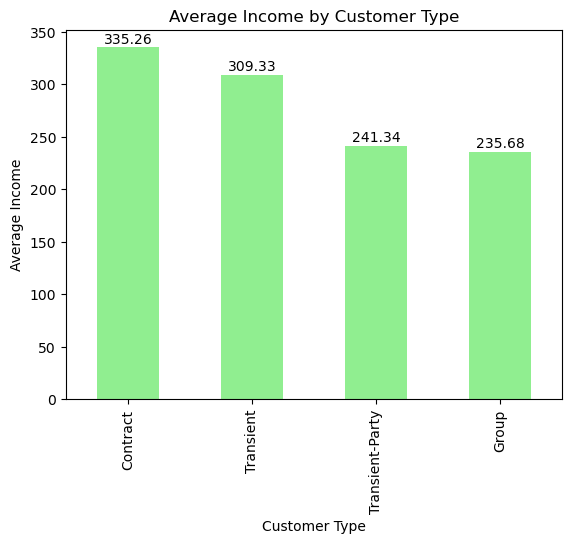

In [30]:
customertype_averagemean = hotel.groupby("CustomerType")["Revenue"].mean().sort_values(ascending=False)
customertype_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Income')

for index, value in enumerate(customertype_averagemean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Booking Meal

In [31]:
hotel["BookingMeal"].value_counts().index.to_list()

['BB', 'SC', 'HB', 'FB']

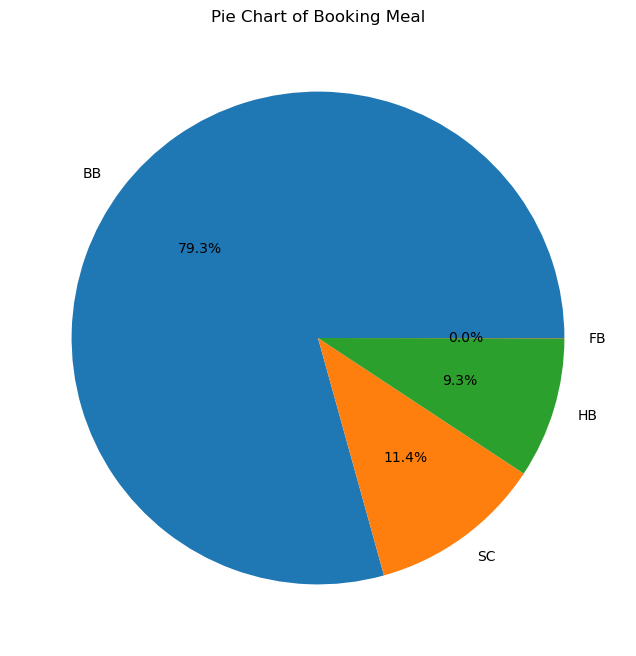

In [32]:
categories = hotel["BookingMeal"].value_counts().index.to_list()
values = hotel["BookingMeal"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Booking Meal')
plt.show()

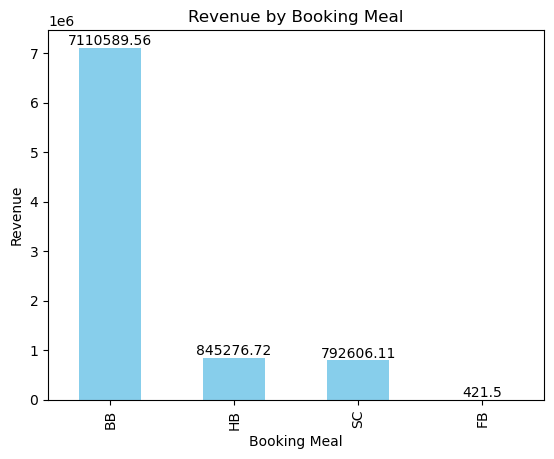

In [33]:
bookingmeal_revenue = hotel.groupby("BookingMeal")["Revenue"].sum().sort_values(ascending=False)
bookingmeal_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Booking Meal')
plt.xlabel('Booking Meal')
plt.ylabel('Revenue')

for index, value in enumerate(bookingmeal_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

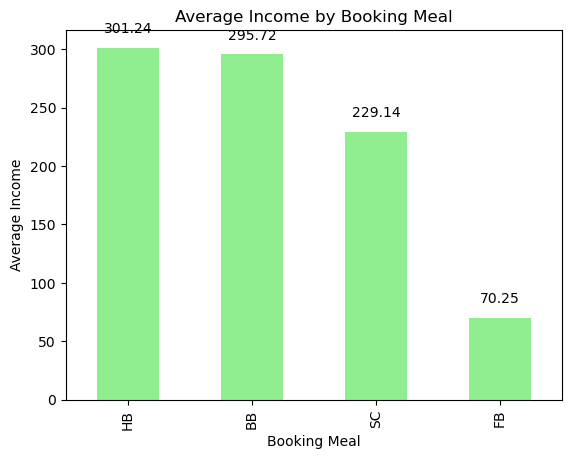

In [34]:
bookingmeal_averagemean = hotel.groupby("BookingMeal")["Revenue"].mean().sort_values(ascending=False)
bookingmeal_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Booking Meal')
plt.xlabel('Booking Meal')
plt.ylabel('Average Income')

for index, value in enumerate(bookingmeal_averagemean):
    plt.text(index, value + 10, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Assigned Room

In [35]:
hotel["AssignedRoom"].value_counts().sort_index()

AssignedRoom
A    19477
B     1371
C       77
D     7084
E     1013
F      841
G      348
K      105
Name: count, dtype: int64

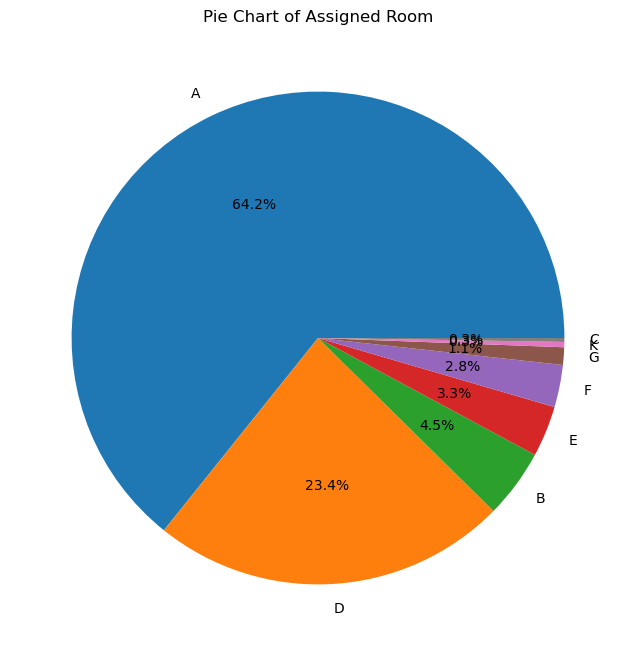

In [36]:
categories = hotel["AssignedRoom"].value_counts().index.to_list()
values = hotel["AssignedRoom"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Assigned Room')
plt.show()

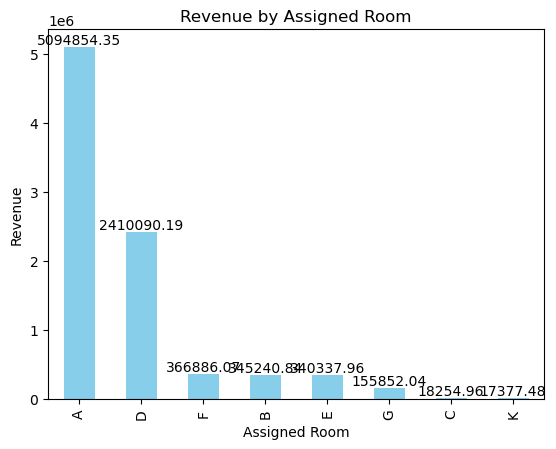

In [37]:
assigendroom_revenue = hotel.groupby("AssignedRoom")["Revenue"].sum().sort_values(ascending=False)
assigendroom_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Assigned Room')
plt.xlabel('Assigned Room')
plt.ylabel('Revenue')

for index, value in enumerate(assigendroom_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

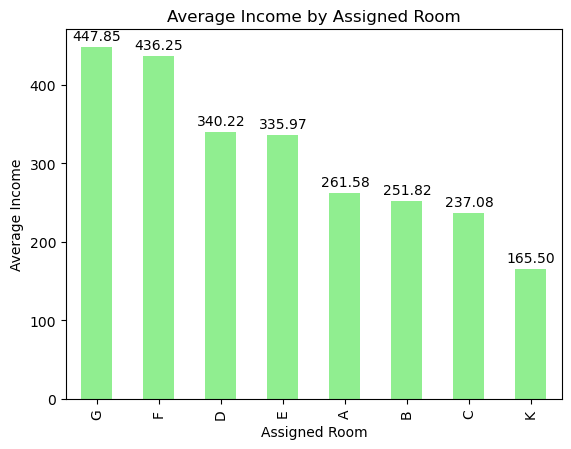

In [38]:
assignedroom_averagemean = hotel.groupby("AssignedRoom")["Revenue"].mean().sort_values(ascending=False)
assignedroom_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Assigned Room')
plt.xlabel('Assigned Room')
plt.ylabel('Average Income')

for index, value in enumerate(assignedroom_averagemean):
    plt.text(index, value + 5, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Booking Company

In [39]:
hotel["BookingCompany"].value_counts().sort_values(ascending=False)

BookingCompany
NULL    28361
40        670
45        160
233       102
67         92
        ...  
379         1
361         1
362         1
351         1
290         1
Name: count, Length: 142, dtype: int64

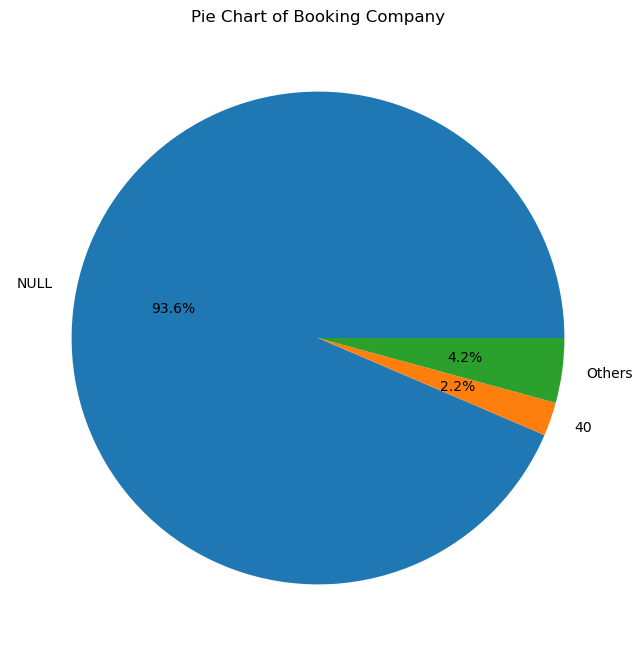

In [40]:
bookingcompany_sorted = hotel["BookingCompany"].value_counts().sort_values(ascending=False)
top2_labels = bookingcompany_sorted[0:2].index
top2_size = bookingcompany_sorted[0:2].values

top2_labels_list = list(top2_labels)
top2_size_list = list(top2_size)
others_size = bookingcompany_sorted[2:].sum()

categories = []
categories.extend(top2_labels_list)
categories.append('Others')

values = []
values.extend(top2_size_list)
values.append(others_size)

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Booking Company')
plt.show()

### Travel Agent

In [41]:
hotel["TravelAgent"].value_counts().sort_values(ascending=False)

TravelAgent
9       11452
NULL     3732
1        1875
7        1829
14       1583
        ...  
355         1
90          1
117         1
294         1
397         1
Name: count, Length: 165, dtype: int64

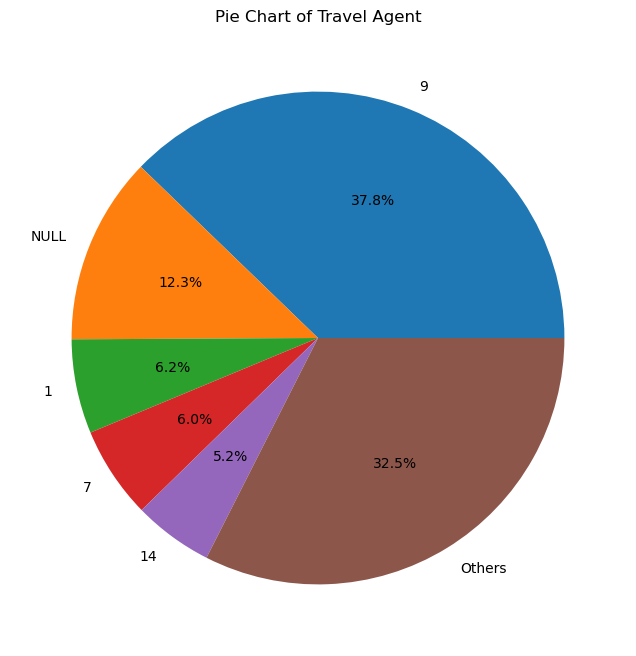

In [42]:
travelagent_sorted = hotel["TravelAgent"].value_counts().sort_values(ascending=False)
top5_labels = travelagent_sorted[0:5].index
top5_size = travelagent_sorted[0:5].values

top5_labels_list = list(top5_labels)
top5_size_list = list(top5_size)
others_size = travelagent_sorted[5:].sum()

categories = []
categories.extend(top5_labels_list)
categories.append('Others')

values = []
values.extend(top5_size_list)
values.append(others_size)

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Travel Agent')
plt.show()

### Booking Distribution Channel

In [43]:
hotel["BookingDistributionChannel"].value_counts()

BookingDistributionChannel
TA/TO        24929
Direct        3382
Corporate     1922
GDS             83
Name: count, dtype: int64

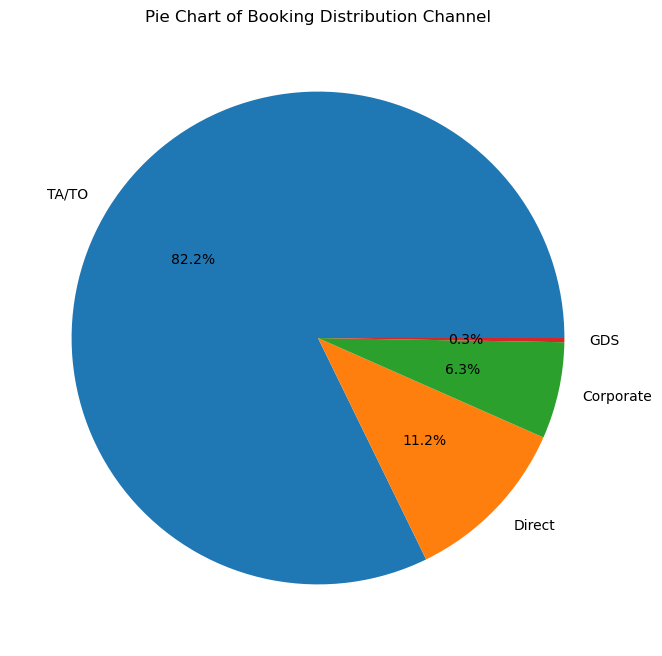

In [44]:
categories = hotel["BookingDistributionChannel"].value_counts().index.to_list()
values = hotel["BookingDistributionChannel"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Booking Distribution Channel')
plt.show()

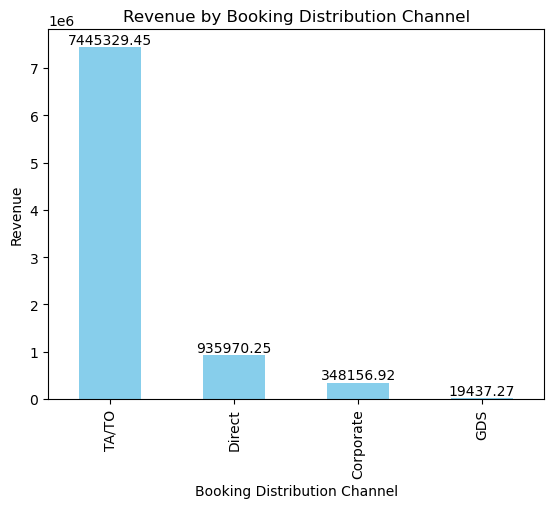

In [45]:
distributionchannel_revenue = hotel.groupby("BookingDistributionChannel")["Revenue"].sum().sort_values(ascending=False)
distributionchannel_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Booking Distribution Channel')
plt.xlabel('Booking Distribution Channel')
plt.ylabel('Revenue')

for index, value in enumerate(distributionchannel_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

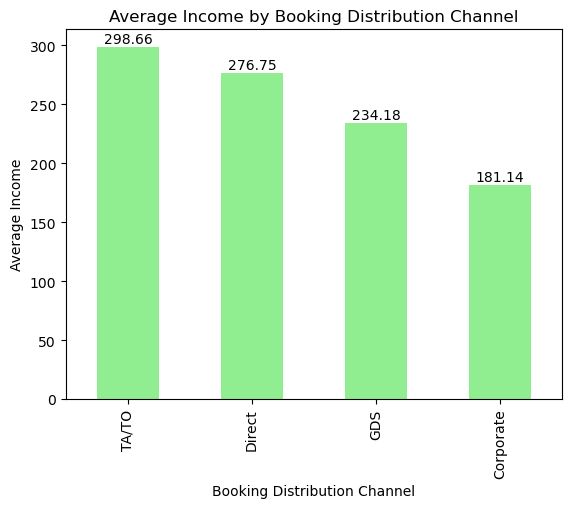

In [46]:
distributionchannel_averagemean = hotel.groupby("BookingDistributionChannel")["Revenue"].mean().sort_values(ascending=False)
distributionchannel_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Booking Distribution Channel')
plt.xlabel('Booking Distribution Channel')
plt.ylabel('Average Income')

for index, value in enumerate(distributionchannel_averagemean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### MarketSegment

In [47]:
hotel["MarketSegment"].value_counts()

MarketSegment
Online TA        14804
Offline TA/TO     7397
Direct            3001
Groups            2878
Corporate         1793
Complementary      345
Aviation            98
Name: count, dtype: int64

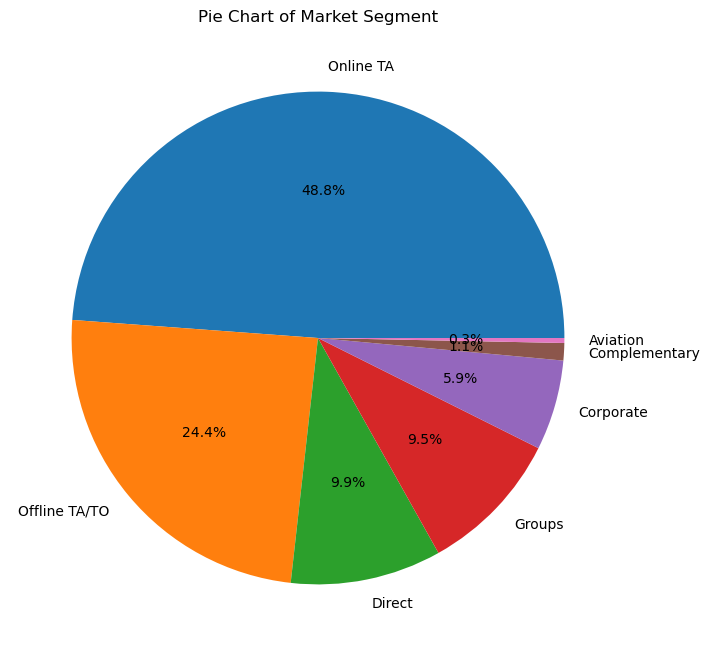

In [48]:
categories = hotel["MarketSegment"].value_counts().index.to_list()
values = hotel["MarketSegment"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Market Segment')
plt.show()

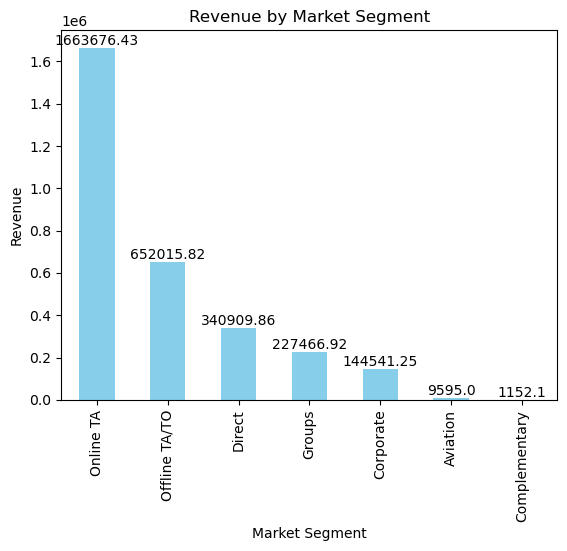

In [49]:
marketsegment_revenue = hotel.groupby("MarketSegment")["AverageDailyRate"].sum().sort_values(ascending=False)
marketsegment_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Revenue')

for index, value in enumerate(marketsegment_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

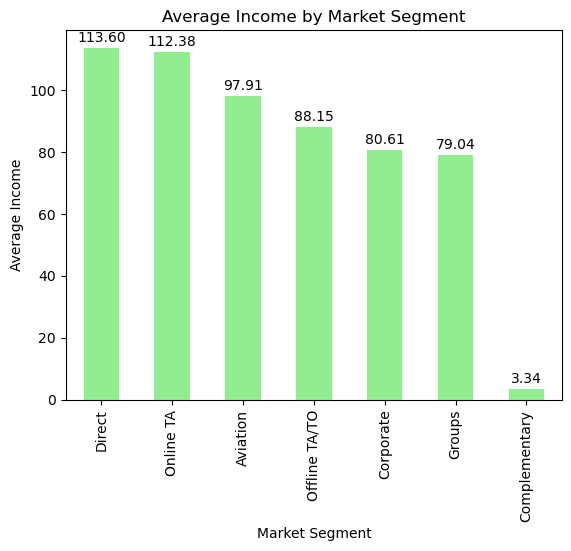

In [50]:
marketsegment_averagemean = hotel.groupby("MarketSegment")["AverageDailyRate"].mean().sort_values(ascending=False)
marketsegment_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Income')

for index, value in enumerate(marketsegment_averagemean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Repeated Guest

In [51]:
hotel["RepeatedGuest"].value_counts()

RepeatedGuest
0    29326
1      990
Name: count, dtype: int64

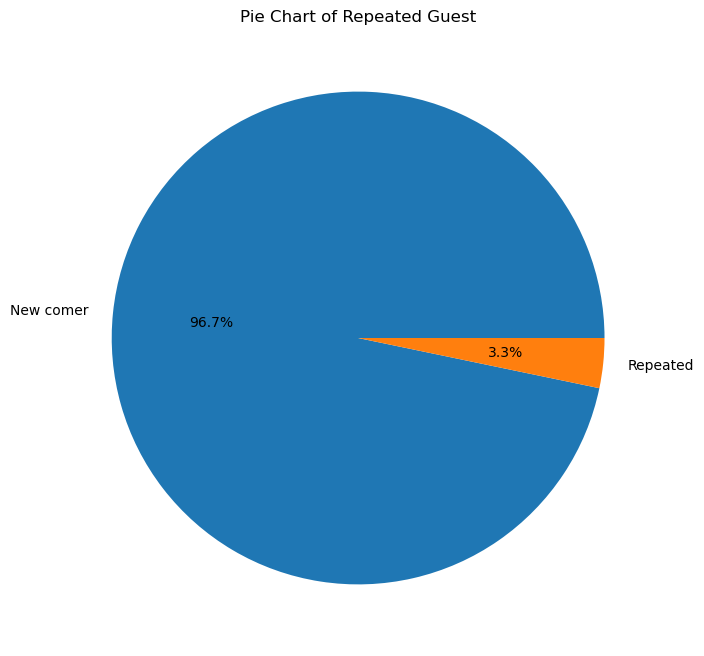

In [52]:
categories = ["New comer", "Repeated"]
values = hotel["RepeatedGuest"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Repeated Guest')
plt.show()

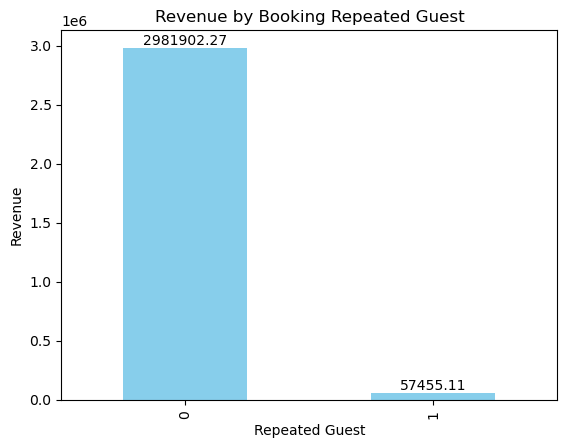

In [53]:
repeatedguest_revenue = hotel.groupby("RepeatedGuest")["AverageDailyRate"].sum().sort_values(ascending=False)
repeatedguest_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Booking Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('Revenue')

for index, value in enumerate(repeatedguest_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

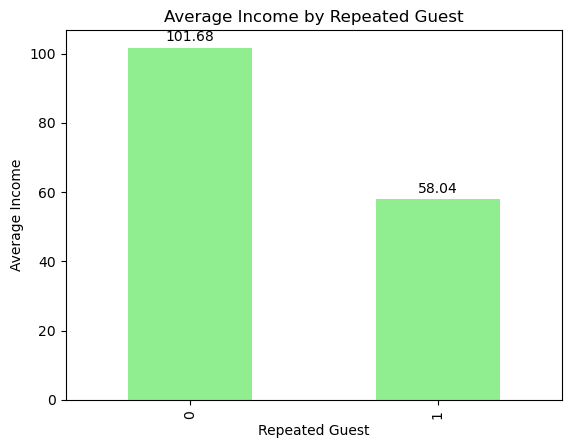

In [54]:
repeatedguest_averagemean = hotel.groupby("RepeatedGuest")["AverageDailyRate"].mean().sort_values(ascending=False)
repeatedguest_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('Average Income')

for index, value in enumerate(repeatedguest_averagemean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Booking Distribution Channel VS Repeated Guest

In [55]:
contingency_table = pd.crosstab(hotel['BookingDistributionChannel'], hotel['RepeatedGuest'])
contingency_table

RepeatedGuest,0,1
BookingDistributionChannel,,
Corporate,1321,601
Direct,3217,165
GDS,81,2
TA/TO,24707,222


### Stays In Week Nights & Stays In Weekend Nights

In [56]:
weekendnight = len(hotel[(hotel["StaysInWeekNights"] == 0) & (hotel["StaysInWeekendNights"] != 0)])
weeknight = len(hotel[(hotel["StaysInWeekNights"] != 0) & (hotel["StaysInWeekendNights"] == 0)])
cross_weekend = len(hotel[(hotel["StaysInWeekNights"] != 0) & (hotel["StaysInWeekendNights"] != 0)])
total = weekendnight + weeknight + cross_weekend
print(f"There are {round(weekendnight/total*100,2)}% lived only in weekend nights")
print(f"There are {round(weeknight/total*100,2)}% lived only in week nights")
print(f"There are {round(cross_weekend/total*100,2)}% lived croos week nights and wenkend nights")

There are 7.01% lived only in weekend nights
There are 47.45% lived only in week nights
There are 45.55% lived croos week nights and wenkend nights


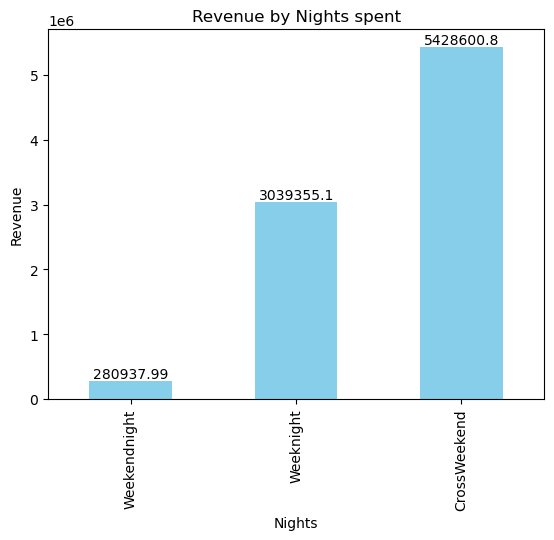

In [57]:
weekendnight_revenue = hotel[(hotel["StaysInWeekNights"] == 0) & (hotel["StaysInWeekendNights"] != 0)]["Revenue"].sum()
weeknight_revenue = hotel[(hotel["StaysInWeekNights"] != 0) & (hotel["StaysInWeekendNights"] == 0)]["Revenue"].sum()
crossweekend_revenue = hotel[(hotel["StaysInWeekNights"] != 0) & (hotel["StaysInWeekendNights"] != 0)]["Revenue"].sum()
dic = {"Weekendnight": weekendnight_revenue, "Weeknight":weeknight_revenue, "CrossWeekend": crossweekend_revenue}
night_revenue = pd.Series(dic)
night_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Nights spent')
plt.xlabel('Nights')
plt.ylabel('Revenue')

for index, value in enumerate(night_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

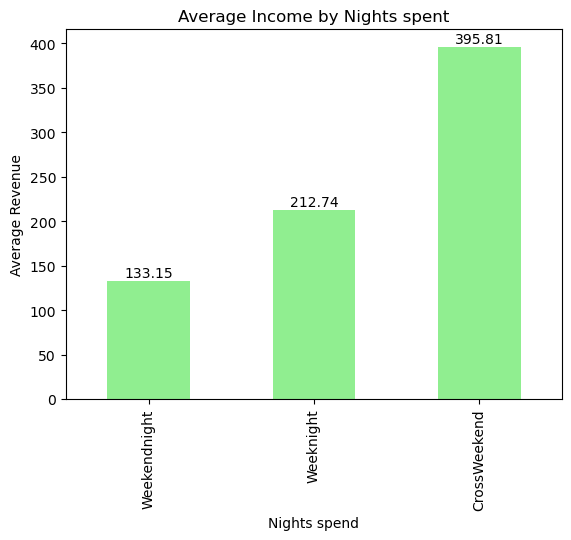

In [58]:
weekendnight_mean_revenue = hotel[(hotel["StaysInWeekNights"] == 0) & (hotel["StaysInWeekendNights"] != 0)]["Revenue"].mean()
weeknight_mean_revenue = hotel[(hotel["StaysInWeekNights"] != 0) & (hotel["StaysInWeekendNights"] == 0)]["Revenue"].mean()
crossweekend_mean_revenue = hotel[(hotel["StaysInWeekNights"] != 0) & (hotel["StaysInWeekendNights"] != 0)]["Revenue"].mean()
dic = {"Weekendnight": weekendnight_mean_revenue, "Weeknight":weeknight_mean_revenue, "CrossWeekend": crossweekend_mean_revenue}
night_mean = pd.Series(dic)

night_mean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Nights spent')
plt.xlabel('Nights spend')
plt.ylabel('Average Revenue')

for index, value in enumerate(night_mean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [59]:
younger = len(hotel[(hotel["NumberOfBabies"] != 0) | (hotel["NumberOfChildren"] != 0)])
onlyadult = len(hotel[(hotel["NumberOfBabies"] == 0) | (hotel["NumberOfChildren"] == 0)])
print(f"There are {onlyadult} data only adults")
print(f"There are {younger} data includes younger")

There are 30277 data only adults
There are 2185 data includes younger
